# Dataquest.io Guided Project:
## Visualizing Earnings Based On College Majors
### Guided Project #4

#### In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.

#### The dataset is of the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey which conducts surveys and aggregates data. It can be found here: https://www.census.gov/programs-surveys/acs/. FiveThirtyEight cleaned the dataset and released it on their Github repo: https://github.com/fivethirtyeight/data/tree/master/college-majors.

# SET UP WORKSPACE

In [1]:
# Import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load Data
recent_grads = pd.read_csv('assets/recent-grads.csv')

## DATA EXPLORATION

In [8]:
# Take a peek
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [9]:
# Print the head
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [10]:
# Print the tail
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


#### Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:
- **Rank** - Rank by median earnings (the dataset is ordered by this column).
- **Major_code** - Major code.
- **Major** - Major description.
- **Major_category** - Category of major.
- **Total** - Total number of people with major.
- **Sample_size** - Sample size (unweighted) of full-time.
- **Men** - Male graduates.
- **Women** - Female graduates.
- **ShareWomen** - Women as share of total.
- **Employed** - Number employed.
- **Median** - Median salary of full-time, year-round workers.
- **Low_wage_jobs** - Number in low-wage service jobs.
- **Full_time** - Number employed 35 hours or more.
- **Part_time** - Number employed less than 35 hours.


In [11]:
# Print summary stats
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [16]:
# Save number of rows in recent_grads df
raw_data_count = len(recent_grads)
print(raw_data_count)

172


In [19]:
# Drop NA's
recent_grads = recent_grads.dropna()
clean_data_count = len(recent_grads)
print(raw_data_count - clean_data_count)

0


Text(0, 0.5, 'Median')

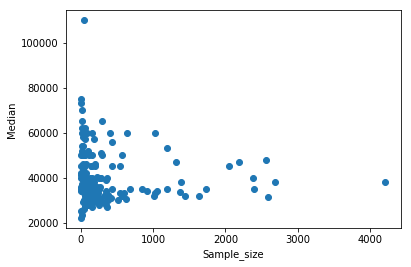

In [26]:
# Scatter plot of Sample_size and Median
plt.scatter(recent_grads['Sample_size'], recent_grads['Median'])
plt.xlabel('Sample_size')
plt.ylabel('Median')

Text(0, 0.5, 'Unemployment_rate')

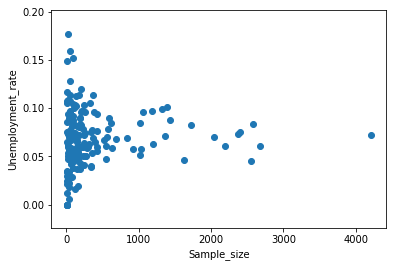

In [27]:
# Scatter plot of Sample_size and Unemployment_rate
plt.scatter(recent_grads['Sample_size'], recent_grads['Unemployment_rate'])
plt.xlabel('Sample_size')
plt.ylabel('Unemployment_rate')

Text(0, 0.5, 'Median')

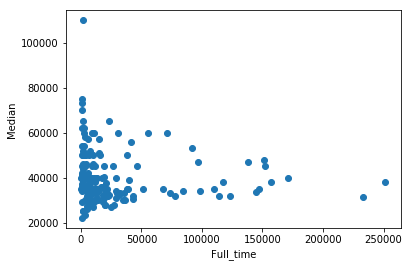

In [28]:
# Scatter plot of Full_time and Median
plt.scatter(recent_grads['Full_time'], recent_grads['Median'])
plt.xlabel('Full_time')
plt.ylabel('Median')

Text(0, 0.5, 'Unemployment_rate')

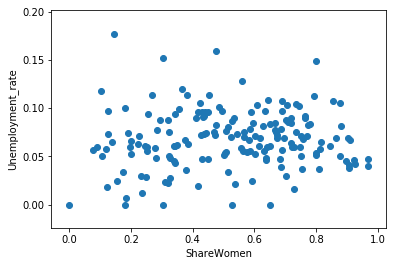

In [29]:
# Scatter plot of ShareWomen and Unemployment_rate
plt.scatter(recent_grads['ShareWomen'], recent_grads['Unemployment_rate'])
plt.xlabel('ShareWomen')
plt.ylabel('Unemployment_rate')

Text(0, 0.5, 'Median')

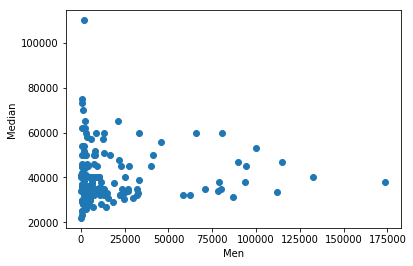

In [30]:
# Scatter plot of Men and Median
plt.scatter(recent_grads['Men'], recent_grads['Median'])
plt.xlabel('Men')
plt.ylabel('Median')

Text(0, 0.5, 'Median')

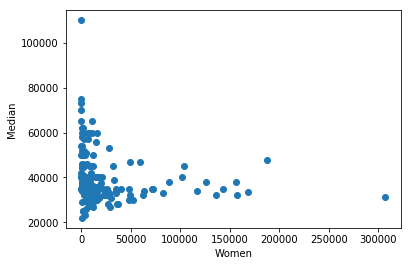

In [31]:
# Scatter plot of Women and Median
plt.scatter(recent_grads['Women'], recent_grads['Median'])
plt.xlabel('Women')
plt.ylabel('Median')

#### It appears that the number of full-time employees and median salary are only slightly negatively correlated.